In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np 
import pandas as pd 
import os

# Data

In [8]:
bs=64 #this is the batch size, ti can be changed if your computer has more or less storage 

In [9]:
path = Path('train');path

PosixPath('train')

In [10]:
path.ls()

[PosixPath('train/.DS_Store'),
 PosixPath('train/Black-grass'),
 PosixPath('train/Charlock'),
 PosixPath('train/Cleavers'),
 PosixPath('train/Common Chickweed'),
 PosixPath('train/Common wheat'),
 PosixPath('train/Fat Hen'),
 PosixPath('train/Loose Silky-bent'),
 PosixPath('train/Maize'),
 PosixPath('train/Scentless Mayweed'),
 PosixPath('train/Shepherds Purse'),
 PosixPath('train/Small-flowered Cranesbill'),
 PosixPath('train/Sugar beet')]

In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(
    path, 
    train=".",
    test='../test', 
    valid_pct=0.2,
    ds_tfms=get_transforms(), 
    size=224, num_workers=4
).normalize(imagenet_stats)

/Applications/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/Applications/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior

In [7]:
print(data.classes)
len(data.classes),data.c

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


(12, 12)

/Applications/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/Applications/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior

/Applications/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


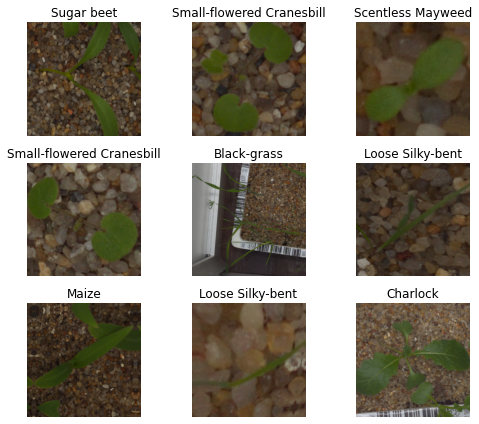

In [8]:
data.show_batch(rows=3,figsize=(7,6))


In [12]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate,model_dir='/tmp/models')

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


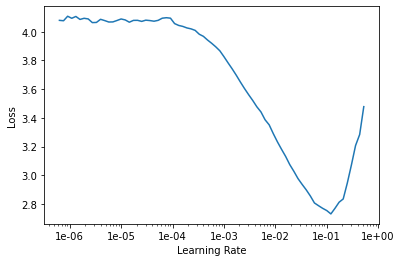

In [11]:
learn.recorder.plot() #we trace the plot in order to understand when the loss starts to increase 

In [12]:
learn.fit_one_cycle(6,slice(1e-2)) #Now that we have the learning rate from where the loss increases, we can train the algorithm by avoiding this part 

epoch,train_loss,valid_loss,error_rate,time
0,1.772260,0.732933,0.235789,28:35
1,1.056821,0.521583,0.183158,30:32
2,0.725573,0.356320,0.126316,30:07
3,0.494751,0.284843,0.098947,32:34
4,0.348031,0.209953,0.073684,34:11
5,0.275867,0.206691,0.070526,34:20


In [13]:
learn.save('stg-1') #We save the first version of the program before looking at the results

# Results

In order to have a look at the results, we We will first see the categories were the model is most confused . We will try to see if what the model predicted was reasonable or not. I
We will then plot the confusion matrix. It allows us to see were the model makes systematic errors.

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

/Applications/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/Applications/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior

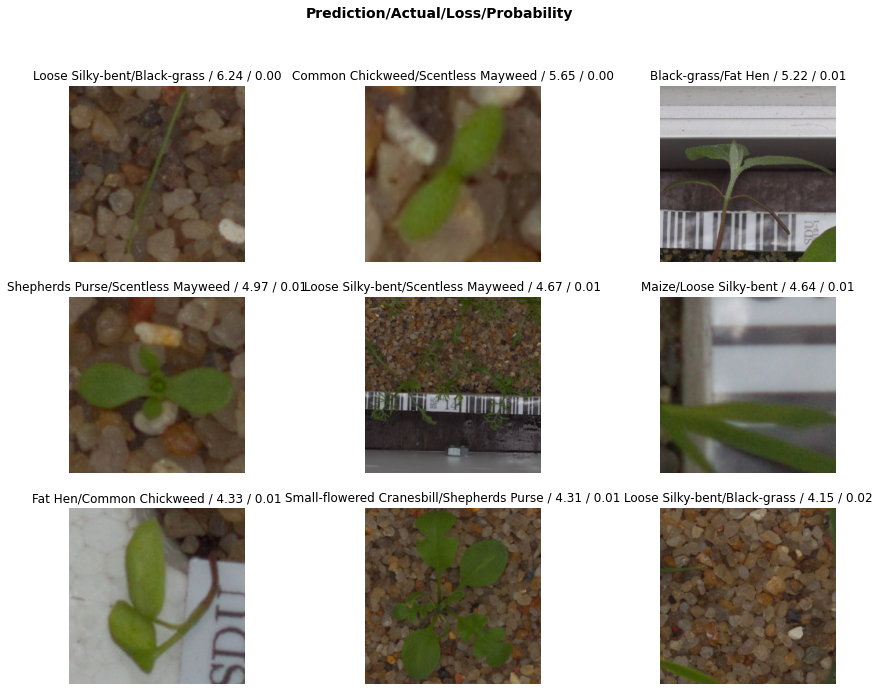

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

In [17]:
doc(interp.plot_top_losses)

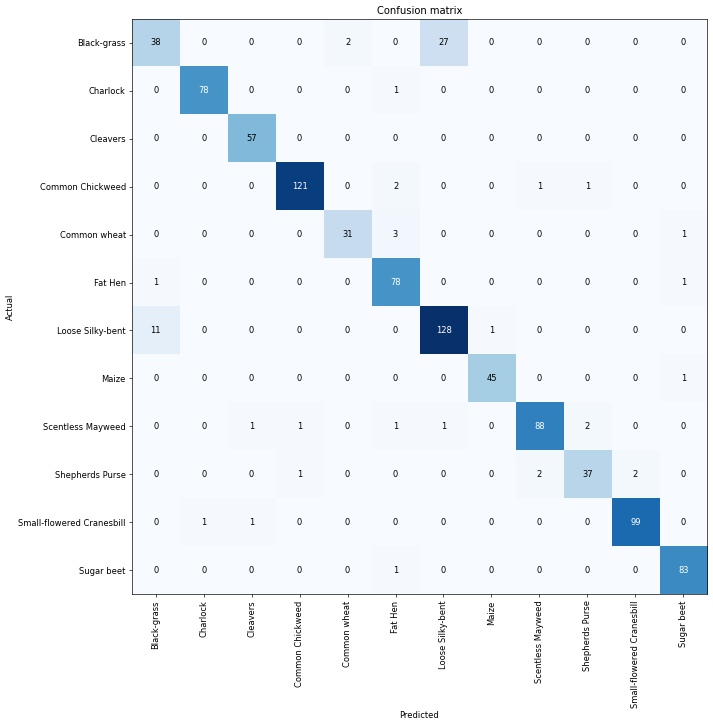

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Unfreezing

We now unfreeze our saved model in order to work on it again and decrease the error rate.  

In [19]:
learn.unfreeze()

We plot the loss according to the learning rate as before. 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


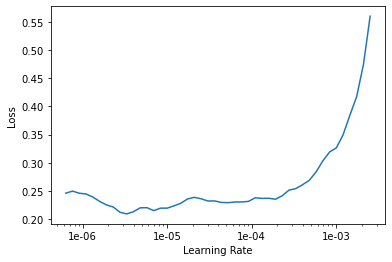

In [20]:
learn.lr_find()
learn.recorder.plot()

We can see that the loss starts to increase at 1E-3 so we focuse on the 1E-6; 1E-3

In [13]:
learn.fit_one_cycle(4,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,2.760147,1.151233,0.365263,29:35
1,1.674247,0.712346,0.254737,33:42
2,1.194670,0.610581,0.218947,33:44
3,1.022248,0.583064,0.206316,31:01


We now have a pretty accurate model. We can focus on the most confused variables. 

In [14]:
learn.save('stg-2')

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

In [16]:
interp.most_confused(min_val=2)

[('Black-grass', 'Loose Silky-bent', 32),
 ('Loose Silky-bent', 'Black-grass', 11),
 ('Sugar beet', 'Fat Hen', 10),
 ('Common Chickweed', 'Scentless Mayweed', 7),
 ('Shepherds Purse', 'Common Chickweed', 7),
 ('Common Chickweed', 'Fat Hen', 6),
 ('Fat Hen', 'Common Chickweed', 5),
 ('Fat Hen', 'Loose Silky-bent', 5),
 ('Scentless Mayweed', 'Common Chickweed', 5),
 ('Scentless Mayweed', 'Loose Silky-bent', 5),
 ('Loose Silky-bent', 'Scentless Mayweed', 4),
 ('Shepherds Purse', 'Scentless Mayweed', 4),
 ('Sugar beet', 'Charlock', 4),
 ('Black-grass', 'Fat Hen', 3),
 ('Charlock', 'Cleavers', 3),
 ('Common wheat', 'Black-grass', 3),
 ('Common wheat', 'Scentless Mayweed', 3),
 ('Maize', 'Charlock', 3),
 ('Maize', 'Sugar beet', 3),
 ('Shepherds Purse', 'Small-flowered Cranesbill', 3),
 ('Small-flowered Cranesbill', 'Common Chickweed', 3),
 ('Black-grass', 'Common wheat', 2),
 ('Cleavers', 'Charlock', 2),
 ('Cleavers', 'Fat Hen', 2),
 ('Common Chickweed', 'Loose Silky-bent', 2),
 ('Common Chi